In [62]:
!pip install textblob 
!pip install snscrape
!pip install beautifulsoup4
!pip install stopwords

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## With NewsApi lets get articles that match the search query within the last 30 days with 1 or more keywords

In [74]:
# set the API endpoint and parameters
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'the',
    'pageSize': 100,  # max is 100
    'language': 'en',
    'apiKey': 'bb4146fab2c74552ad299e0d0f4028fa'
}

# send the first GET request to get the total number of results
params['page'] = 1
response = requests.get(url, params=params)
json_data = response.json()

# retrieve all the articles by making multiple requests with a loop
articles = []
if json_data.get('articles'):
    for page in range(1, (json_data['totalResults'] // 200) + 2):
        params['page'] = page
        response = requests.get(url, params=params)
        json_data = response.json()
        if json_data.get('articles'):
            for article in json_data['articles']:
                # perform sentiment analysis on the article content
                content = article['content']
                if content is not None:
                    blob = TextBlob(content)
                    sentiment_score = blob.sentiment.polarity
                else:
                    sentiment_score = None

                articles.append({
                    'title': article['title'],
                    'date': article['publishedAt'],
                    'content': content,
                    'publisher': article['source']['name'],
                    'sentiment_score': sentiment_score
                })
        else:
            break

# create a pandas dataframe with the articles list
if articles:
    df = pd.DataFrame(articles)
    
else:
    print('No articles found for the given search query and parameters.')

In [75]:
df

,title,date,content,publisher,sentiment_score
0,This Is the Lightest Paint in the World,2023-03-22T11:00:00Z,"Dayna Baumeister, codirector of Arizona State ...",Wired,0.122222
1,The Apple Watch SE drops to its lowest price y...,2023-03-17T16:45:28Z,All products recommended by Engadget are selec...,Engadget,0.000000
2,The Out-of-Touch Adults' Guide to Kid Culture:...,2023-04-07T15:00:00Z,This weeks Out-of-Touch Adults Guide explores ...,Lifehacker.com,0.200000
3,Imploring TikTok to “Think of the Children” Mi...,2023-03-25T11:00:00Z,nearly every Congressional hearing on Big Tech...,Wired,0.150000
4,The Dangerous Weak Link in the US Food Chain,2023-04-06T12:00:00Z,Just-in-time logistics mean that even short-te...,Wired,-0.322917
...,...,...,...,...,...
95,The 1TB Samsung T7 portable SSD drops to a rec...,2023-03-14T20:00:30Z,All products recommended by Engadget are selec...,Engadget,0.000000
96,New Zealand is the latest country to ban TikTo...,2023-03-17T14:35:39Z,New Zealand has joined the growing list of cou...,Engadget,0.175325
97,TikTok CEO says selling the app won't satisfy ...,2023-03-16T15:37:17Z,"TikTok\r\n CEO Shou Zi Chew has claimed that, ...",Engadget,0.000000
98,The Morning After: Xbox's mobile game store co...,2023-03-21T11:20:26Z,Microsoft could launch an Xbox store on iOS an...,Engadget,0.087500


In [70]:
df['content'][4] #we can see that we have the full article

'Just-in-time logistics mean that even short-term cyberattacks\xa0can have serious consequences.\xa0Hacks that disrupt fertilizer or pesticide production can force farmers to sit out planting seasons. Breac… [+3255 chars]'

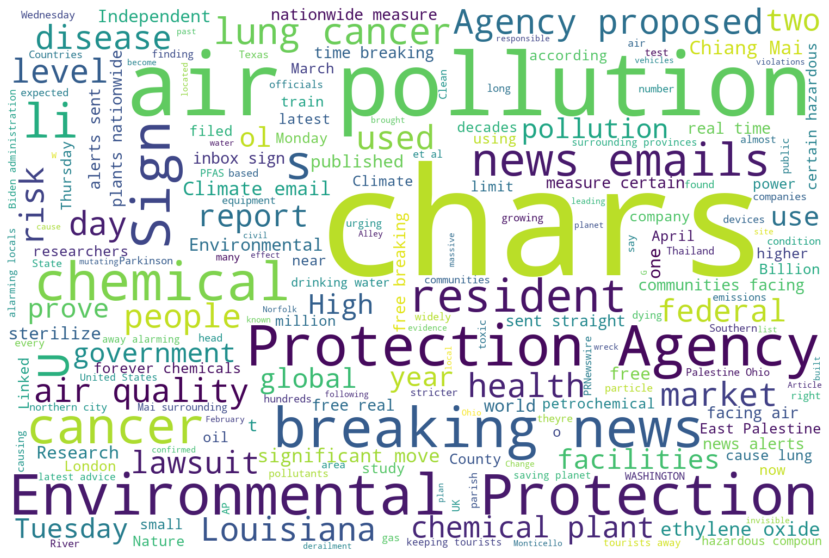

In [83]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# some stopwords to be removed (because i already seen the image and it had them but they're useless)
stopwords = set(['the', 'and','is'])

# preprocess the text data by removing the stopwords
text_column = df['content']
text = ' '.join(text_column.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords])))

wordcloud = WordCloud(width=1500, height=1000, background_color='white').generate(text)

fig, ax = plt.subplots(figsize=(15, 10))

# plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The News API limits the number of results that can be returned in a single request to 100. However, we can use pagination to retrieve additional results beyond the first 100. but since the results go up to 1 month this doesnt change the ouptup since the articles in that period are limited


In [93]:
# set the API endpoint and parameters
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'cancer AND air pollution',
    'pageSize': 100,
    'language': 'en',
    'apiKey': 'bb4146fab2c74552ad299e0d0f4028fa'
}

# send the first GET request to get the total number of results
params['page'] = 1
response = requests.get(url, params=params)
json_data = response.json()

# retrieve all the articles by making multiple requests with a loop
articles = []
if json_data.get('articles'):
    for page in range(1, (json_data['totalResults'] // 100) + 2):
        params['page'] = page
        response = requests.get(url, params=params)
        json_data = response.json()
        if json_data.get('articles'):
            for article in json_data['articles']:
                # perform sentiment analysis on the article content
                content = article['content']
                if content is not None:
                    blob = TextBlob(content)
                    sentiment_score = blob.sentiment.polarity
                else:
                    sentiment_score = None

                articles.append({
                    'title': article['title'],
                    'date': article['publishedAt'],
                    'content': content,
                    'publisher': article['source']['name'],
                    'sentiment_score': sentiment_score
                })
        else:
            break

# create a pandas dataframe with the articles list
if articles:
    df = pd.DataFrame(articles)

    # print the dataframe
    df
else:
    print('No articles found for the given search query and parameters.')

In [94]:
df

,title,date,content,publisher,sentiment_score
0,You Are What You Breathe. How to Test Your Hom...,2023-03-14T20:43:55Z,Air pollution can be easy to ignore from day t...,Time,0.074306
1,Climate emergency is the biggest health crisis...,2023-04-10T14:57:29Z,The latest Intergovernmental Panel on Climate ...,The Guardian,-0.166667
2,'Cancer Alley' at center of lawsuit claiming e...,2023-03-23T12:21:37Z,"The residents of a Louisiana parish, located i...",ABC News,0.000000
3,EPA cracks down on 'forever chemicals' in tap ...,2023-03-14T14:44:43Z,"PFAS, or ""forever chemicals,"" are an increasin...",Business Insider,0.000000
4,Air pollution’s role in the promotion of lung ...,2023-04-05T00:00:00Z,"<li>Hill, W. et al.Nature616, 159167 (2023).\r...",Nature.com,0.000000
...,...,...,...,...,...
95,Ozone-depleting CFC chemicals are making an al...,2023-04-04T10:36:24Z,Sign up to the Independent Climate email for t...,Independent,0.220000
96,Millions of Americans Could Be Unknowingly Liv...,2023-04-05T10:00:00Z,American Lung Association launches campaign to...,Yahoo Entertainment,0.033333
97,The EPA Is Finally Going to Limit Forever Chem...,2023-03-14T18:35:00Z,The U.S. Environmental Protection Agency annou...,Gizmodo Australia,0.000000
98,The Glioblastoma Multiforme (GBM) Treatment Ma...,2023-04-13T09:31:00Z,The Business Research Company's global market ...,Yahoo Entertainment,0.250000


## Because of NewsApi Limitations of the free subscription we tried to change approach to get the articles  and tweets data
Indeed I used a scraping service APIFY(https://apify.com/) since by doing the normal scraping I could only get 100 articles a time and always the same ones, and to do scraping with twitter you need to use their API(but the policies recently change so we didnt manage to get the accounts approved). The bad thing about  apify is that from google news I could get only the title and not the entire article, and for the tweets theres no possibility to specify the language.

In [3]:
#the keywords to search were air pollution and cancer

a= pd.read_csv('dataset_google-news-scraper_2023-04-15_11-57-57-994.csv') #cancer articles
b= pd.read_csv('dataset_google-news-scraper_2023-04-15_12-25-06-068.csv') #air pollution

# concatenate the two dataframes into a single dataframe
df = pd.concat([a, b])

df

,link,publishedAt,source,title
0,https://news.google.com/rss/articles/CBMidGh0d...,2022-12-26T08:00:00.000Z,USA TODAY,Blood pressure tablets recalled over potential...
1,https://news.google.com/rss/articles/CBMidWh0d...,2022-10-31T07:00:00.000Z,The ASCO Post,Neoadjuvant Immunotherapy With Relatlimab and ...
2,https://news.google.com/rss/articles/CBMilwFod...,2022-11-17T08:00:00.000Z,The ASCO Post,Dabrafenib in Combination With Trametinib for ...
3,https://news.google.com/rss/articles/CBMiWGh0d...,2022-12-26T08:00:00.000Z,New York Post,Kansas cops raid terminally ill patient's hosp...
4,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-08T08:00:00.000Z,The Times of Israel,2 common drugs may help protect against second...
...,...,...,...,...
97970,https://news.google.com/rss/articles/CBMidWh0d...,2020-11-05T08:00:00.000Z,Worcester Mag,Bald eagles of Worcester county are back
97971,https://news.google.com/rss/articles/CBMiUGh0d...,2020-11-05T08:00:00.000Z,Home of the Olympic Channel,"2020 Vuelta a Espana TV, live stream schedule"
97972,https://news.google.com/rss/articles/CBMipAFod...,2020-11-05T08:00:00.000Z,Courier & Press,Former USI head coach Rodney Watson to join So...
97973,https://news.google.com/rss/articles/CBMiLGh0d...,2020-11-05T08:00:00.000Z,SHINE News,"Takeda returns to CIIE, commits to China - SHI..."


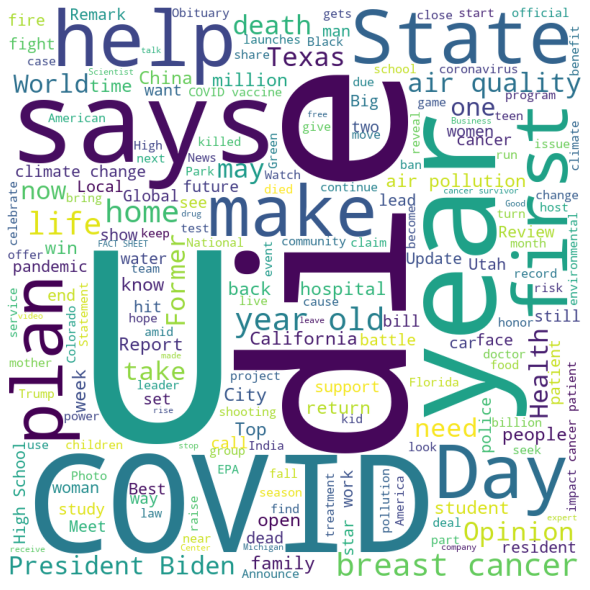

In [41]:
from wordcloud import WordCloud, STOPWORDS

# concatenate all the strings in the column
text = ' '.join(df['title'])

# create a set of stopwords
stopwords = set(STOPWORDS)

# add a specific word to the set of stopwords
stopwords.add('New')
stopwords.add('say')
stopwords.add('will')
stopwords.add('s')


# generate the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)

# plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [42]:
df['source'].value_counts() #lets see who are the most active publishers regarding the air pollution and cancer topics

The New York Times      4801
The White House         4471
Forbes                  4231
The Washington Post     3821
GlobeNewswire           3010
                        ... 
Hungarian Free Press       1
Swindon Advertiser         1
God Is In The TV           1
NYU Langone Health         1
Digital Commerce 360       1
Name: source, Length: 6005, dtype: int64

In [43]:
from textblob import TextBlob

def get_sentiment(text):
    """
    Returns the sentiment polarity of the given text as a float between -1 (bad) and 1(good).
    """
    blob = TextBlob(text)
    return blob.sentiment.polarity
# Apply sentiment analysis function to title column
df['title_sentiment'] = df['title'].apply(get_sentiment)


In [44]:
df

,link,publishedAt,source,title,title_sentiment
0,https://news.google.com/rss/articles/CBMidGh0d...,2022-12-26T08:00:00.000Z,USA TODAY,Blood pressure tablets recalled over potential...,0.000000
1,https://news.google.com/rss/articles/CBMidWh0d...,2022-10-31T07:00:00.000Z,The ASCO Post,Neoadjuvant Immunotherapy With Relatlimab and ...,0.000000
2,https://news.google.com/rss/articles/CBMilwFod...,2022-11-17T08:00:00.000Z,The ASCO Post,Dabrafenib in Combination With Trametinib for ...,0.000000
3,https://news.google.com/rss/articles/CBMiWGh0d...,2022-12-26T08:00:00.000Z,New York Post,Kansas cops raid terminally ill patient's hosp...,-0.500000
4,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-08T08:00:00.000Z,The Times of Israel,2 common drugs may help protect against second...,-0.283333
...,...,...,...,...,...
97970,https://news.google.com/rss/articles/CBMidWh0d...,2020-11-05T08:00:00.000Z,Worcester Mag,Bald eagles of Worcester county are back,0.000000
97971,https://news.google.com/rss/articles/CBMiUGh0d...,2020-11-05T08:00:00.000Z,Home of the Olympic Channel,"2020 Vuelta a Espana TV, live stream schedule",0.136364
97972,https://news.google.com/rss/articles/CBMipAFod...,2020-11-05T08:00:00.000Z,Courier & Press,Former USI head coach Rodney Watson to join So...,0.000000
97973,https://news.google.com/rss/articles/CBMiLGh0d...,2020-11-05T08:00:00.000Z,SHINE News,"Takeda returns to CIIE, commits to China - SHI...",0.000000


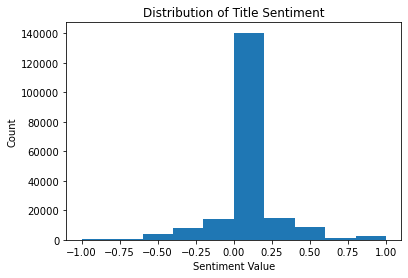

In [47]:
# Create histogram of title_sentiment column
plt.hist(df['title_sentiment'], bins=10)

# Add labels and title to plot
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Distribution of Title Sentiment')

# Show plot
plt.show()

## Lets compare the sentiment from tweets, the tweets where scraped by using APIFY, the input were 2 keywords air pollution and cancer

In [49]:
tweet=pd.read_csv('dataset_twitter-scraper_2023-04-15_11-50-57-970.csv')

C:\Users\blure\AppData\Local\Temp\ipykernel_15776\2301912888.py:1: DtypeWarning: Columns (32,33,34,42,48,51,66,67,68,69,70,71,72,73,74,75,76,77,81,85,88,91,92,96,97,98,99,107,108,109,110,111,112,113,114,115,137,138,139,141,142,143,145,146,147,149,150,151,153,154,155,157,158,159,161,162,163,165,166,167,178,179,180,181,182,183,184,185,196,197,198,199,200,201,263,264,265,267,268,269,271,272,273,275,276,277,279,280,281,283,284,285,287,288,289,291,292,293,295,296,297,299,300,301,303,304,305,307,308,309,311,312,313,315,316,317,319,320,321,323,324,325,327,328,329,331,332,333,335,336,337,339,340,341,343,344,345,347,348,349,351,352,353,355,356,357,359,360,361,363,364,365,367,368,369,371,372,373,375,376,377,379,380,381,383,384,385,387,388,389,391,392,393,395,396,397) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet=pd.read_csv('dataset_twitter-scraper_2023-04-15_11-50-57-970.csv')


In [50]:
tweet

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/46/screen_name,user_mentions/47/id_str,user_mentions/47/name,user_mentions/47/profile,user_mentions/47/screen_name,user_mentions/48/id_str,user_mentions/48/name,user_mentions/48/profile,user_mentions/48/screen_name,view_count
0,1647191988771647490,2023-04-15T10:55:48.000Z,0,Help our friend stay alive!!! 😤 #Cancer,Cancer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1647191968529915905,2023-04-15T10:55:43.000Z,0,Should we fight the propaganda of Nandini vs A...,bournvita,sugar,cancer,immunity,fake,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1647191854876880896,2023-04-15T10:55:16.000Z,0,https://t.co/KbQ9oXSg6R\ndeveloped #degrader #...,degrader,molecules,DEG35,DEG77,proteins,cancer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1647190908951994368,2023-04-15T10:51:30.000Z,0,"“Million-year-old #viruses help fight #cancer,...",viruses,cancer,scientists,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,1647188135703396355,2023-04-15T10:40:29.000Z,1,#CiudadReal Esto se ha de hacer con el alma......,CiudadReal,DEMI,cáncer,ciega,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1644034789098258437,2023-04-06T17:50:13.000Z,2,"At my 6-month checkup, it wasn’t good news. Su...",memoir,Overcoming,FREE,Survival,Triumph,Divorcelady,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0
9996,1644034257642221571,2023-04-06T17:48:06.000Z,0,Hugh Jackman da negativo ante el riesgo de cán...,CÁNCER,PIEL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
9997,1644033562818015243,2023-04-06T17:45:20.000Z,0,@LucyB_Tacos Anti #Cancer #TACOS are the best ...,Cancer,TACOS,AllicinV,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0
9998,1643916821295243264,2023-04-06T10:01:27.000Z,179,Malia Obama to Direct Her First Short Film Und...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9846.0


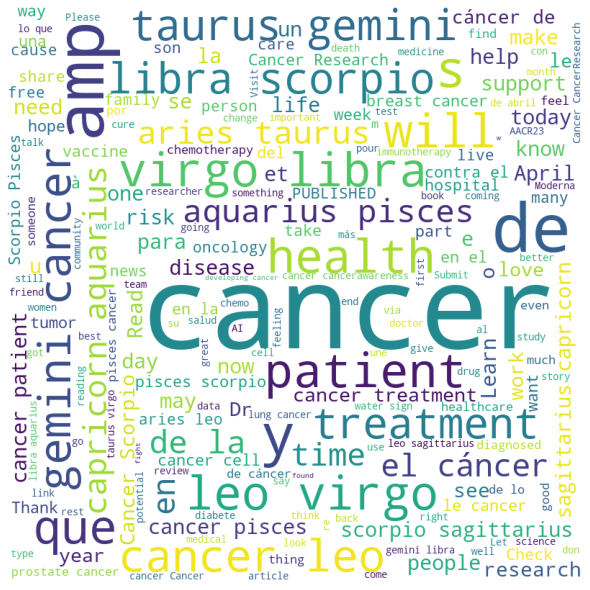

In [52]:
# concatenate all the strings in the column
text = ' '.join(tweet['full_text'])

# create a set of stopwords
stopwords = set(STOPWORDS)

# add a specific word to the set of stopwords
stopwords.add('New')
stopwords.add('co')
stopwords.add('t')
stopwords.add('https')


# generate the wordcloud
wordcloudtweet = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)

# plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloudtweet) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()
#we can see that the results are not insightful because part of the tweets were about ...

In [53]:
tweet['title_sentiment'] = tweet['full_text'].apply(get_sentiment)


In [54]:
tweet

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/47/id_str,user_mentions/47/name,user_mentions/47/profile,user_mentions/47/screen_name,user_mentions/48/id_str,user_mentions/48/name,user_mentions/48/profile,user_mentions/48/screen_name,view_count,title_sentiment
0,1647191988771647490,2023-04-15T10:55:48.000Z,0,Help our friend stay alive!!! 😤 #Cancer,Cancer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195312
1,1647191968529915905,2023-04-15T10:55:43.000Z,0,Should we fight the propaganda of Nandini vs A...,bournvita,sugar,cancer,immunity,fake,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000
2,1647191854876880896,2023-04-15T10:55:16.000Z,0,https://t.co/KbQ9oXSg6R\ndeveloped #degrader #...,degrader,molecules,DEG35,DEG77,proteins,cancer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.185185
3,1647190908951994368,2023-04-15T10:51:30.000Z,0,"“Million-year-old #viruses help fight #cancer,...",viruses,cancer,scientists,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.000000
4,1647188135703396355,2023-04-15T10:40:29.000Z,1,#CiudadReal Esto se ha de hacer con el alma......,CiudadReal,DEMI,cáncer,ciega,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1644034789098258437,2023-04-06T17:50:13.000Z,2,"At my 6-month checkup, it wasn’t good news. Su...",memoir,Overcoming,FREE,Survival,Triumph,Divorcelady,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,0.580000
9996,1644034257642221571,2023-04-06T17:48:06.000Z,0,Hugh Jackman da negativo ante el riesgo de cán...,CÁNCER,PIEL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.000000
9997,1644033562818015243,2023-04-06T17:45:20.000Z,0,@LucyB_Tacos Anti #Cancer #TACOS are the best ...,Cancer,TACOS,AllicinV,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,0.800000
9998,1643916821295243264,2023-04-06T10:01:27.000Z,179,Malia Obama to Direct Her First Short Film Und...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9846.0,0.121591


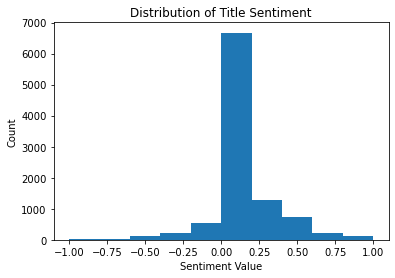

In [55]:
# Create histogram of title_sentiment column
plt.hist(tweet['title_sentiment'], bins=10)

# Add labels and title to plot
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Distribution of Title Sentiment')

# Show plot
plt.show()